In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Esdras_1 = "Now in the first year of Cyrus king of Persia, that the word of the LORD by the mouth of Jeremiah might be fulfilled, the LORD stirred up the spirit of Cyrus king of Persia, that he made a proclamation throughout all his kingdom, and put it also in writing, saying,Thus said Cyrus king of Persia, The LORD God of heaven has given me all the kingdoms of the earth; and he has charged me to build him an house at Jerusalem, which is in Judah.Who is there among you of all his people? his God be with him, and let him go up to Jerusalem, which is in Judah, and build the house of the LORD God of Israel, (he is the God,) which is in Jerusalem.And whoever remains in any place where he sojournes, let the men of his place help him with silver, and with gold, and with goods, and with beasts, beside the freewill offering for the house of God that is in Jerusalem.Then rose up the chief of the fathers of Judah and Benjamin, and the priests, and the Levites, with all them whose spirit God had raised, to go up to build the house of the LORD which is in Jerusalem.And all they that were about them strengthened their hands with vessels of silver, with gold, with goods, and with beasts, and with precious things, beside all that was willingly offered.Also Cyrus the king brought forth the vessels of the house of the LORD, which Nebuchadnezzar had brought forth out of Jerusalem, and had put them in the house of his gods;Even those did Cyrus king of Persia bring forth by the hand of Mithredath the treasurer, and numbered them to Sheshbazzar, the prince of Judah.And this is the number of them: thirty chargers of gold, a thousand chargers of silver, nine and twenty knives,Thirty basins of gold, silver basins of a second sort four hundred and ten, and other vessels a thousand.All the vessels of gold and of silver were five thousand and four hundred. All these did Sheshbazzar bring up with them of the captivity that were brought up from Babylon to Jerusalem.".lower()

In [6]:
Esdras_2 = "Now these are the children of the province that went up out of the captivity, of those which had been carried away, whom Nebuchadnezzar the king of Babylon had carried away to Babylon, and came again to Jerusalem and Judah, every one to his city;Which came with Zerubbabel: Jeshua, Nehemiah, Seraiah, Reelaiah, Mordecai, Bilshan, Mizpar, Bigvai, Rehum, Baanah. The number of the men of the people of Israel:The children of Parosh, two thousand an hundred seventy and two.The children of Shephatiah, three hundred seventy and two.The children of Arah, seven hundred seventy and five.The children of Pahathmoab, of the children of Jeshua and Joab, two thousand eight hundred and twelve.The children of Elam, a thousand two hundred fifty and four.The children of Zattu, nine hundred forty and five.The children of Zaccai, seven hundred and three score.The children of Bani, six hundred forty and two.The children of Bebai, six hundred twenty and three.The children of Azgad, a thousand two hundred twenty and two.The children of Adonikam, six hundred sixty and six.The children of Bigvai, two thousand fifty and six.The children of Adin, four hundred fifty and four.The children of Ater of Hezekiah, ninety and eight.The children of Bezai, three hundred twenty and three.The children of Jorah, an hundred and twelve.The children of Hashum, two hundred twenty and three.The children of Gibbar, ninety and five.The children of Bethlehem, an hundred twenty and three.The men of Netophah, fifty and six.The men of Anathoth, an hundred twenty and eight.The children of Azmaveth, forty and two.The children of Kirjatharim, Chephirah, and Beeroth, seven hundred and forty and three.The children of Ramah and Gaba, six hundred twenty and one.The men of Michmas, an hundred twenty and two.The men of Bethel and Ai, two hundred twenty and three.The children of Nebo, fifty and two.The children of Magbish, an hundred fifty and six.The children of the other Elam, a thousand two hundred fifty and four.The children of Harim, three hundred and twenty.The children of Lod, Hadid, and Ono, seven hundred twenty and five.The children of Jericho, three hundred forty and five.The children of Senaah, three thousand and six hundred and thirty.The priests: the children of Jedaiah, of the house of Jeshua, nine hundred seventy and three.The children of Immer, a thousand fifty and two.The children of Pashur, a thousand two hundred forty and seven.The children of Harim, a thousand and seventeen.The Levites: the children of Jeshua and Kadmiel, of the children of Hodaviah, seventy and four.The singers: the children of Asaph, an hundred twenty and eight.The children of the porters: the children of Shallum, the children of Ater, the children of Talmon, the children of Akkub, the children of Hatita, the children of Shobai, in all an hundred thirty and nine.The Nethinims: the children of Ziha, the children of Hasupha, the children of Tabbaoth,The children of Keros, the children of Siaha, the children of Padon,The children of Lebanah, the children of Hagabah, the children of Akkub,The children of Hagab, the children of Shalmai, the children of Hanan,The children of Giddel, the children of Gahar, the children of Reaiah,The children of Rezin, the children of Nekoda, the children of Gazzam,The children of Uzza, the children of Paseah, the children of Besai,The children of Asnah, the children of Mehunim, the children of Nephusim,The children of Bakbuk, the children of Hakupha, the children of Harhur,The children of Bazluth, the children of Mehida, the children of Harsha,The children of Barkos, the children of Sisera, the children of Thamah,The children of Neziah, the children of Hatipha.The children of Solomon' servants: the children of Sotai, the children of Sophereth, the children of Peruda,The children of Jaalah, the children of Darkon, the children of Giddel,The children of Shephatiah, the children of Hattil, the children of Pochereth of Zebaim, the children of Ami.All the Nethinims, and the children of Solomon' servants, were three hundred ninety and two.And these were they which went up from Telmelah, Telharsa, Cherub, Addan, and Immer: but they could not show their father' house, and their seed, whether they were of Israel:The children of Delaiah, the children of Tobiah, the children of Nekoda, six hundred fifty and two.And of the children of the priests: the children of Habaiah, the children of Koz, the children of Barzillai; which took a wife of the daughters of Barzillai the Gileadite, and was called after their name:These sought their register among those that were reckoned by genealogy, but they were not found: therefore were they, as polluted, put from the priesthood.And the Tirshatha said to them, that they should not eat of the most holy things, till there stood up a priest with Urim and with Thummim.The whole congregation together was forty and two thousand three hundred and three score,Beside their servants and their maids, of whom there were seven thousand three hundred thirty and seven: and there were among them two hundred singing men and singing women.Their horses were seven hundred thirty and six; their mules, two hundred forty and five;Their camels, four hundred thirty and five; their asses, six thousand seven hundred and twenty.And some of the chief of the fathers, when they came to the house of the LORD which is at Jerusalem, offered freely for the house of God to set it up in his place:They gave after their ability to the treasure of the work three score and one thousand drams of gold, and five thousand pound of silver, and one hundred priests'garments.So the priests, and the Levites, and some of the people, and the singers, and the porters, and the Nethinims, dwelled in their cities, and all Israel in their cities.".lower()

In [7]:
Esdras_3 = "And when the seventh month was come, and the children of Israel were in the cities, the people gathered themselves together as one man to Jerusalem.Then stood up Jeshua the son of Jozadak, and his brothers the priests, and Zerubbabel the son of Shealtiel, and his brothers, and built the altar of the God of Israel, to offer burnt offerings thereon, as it is written in the law of Moses the man of God.And they set the altar on his bases; for fear was on them because of the people of those countries: and they offered burnt offerings thereon to the LORD, even burnt offerings morning and evening.They kept also the feast of tabernacles, as it is written, and offered the daily burnt offerings by number, according to the custom, as the duty of every day required;And afterward offered the continual burnt offering, both of the new moons, and of all the set feasts of the LORD that were consecrated, and of every one that willingly offered a freewill offering to the LORD.From the first day of the seventh month began they to offer burnt offerings to the LORD. But the foundation of the temple of the LORD was not yet laid.They gave money also to the masons, and to the carpenters; and meat, and drink, and oil, to them of Zidon, and to them of Tyre, to bring cedar trees from Lebanon to the sea of Joppa, according to the grant that they had of Cyrus king of Persia.Now in the second year of their coming to the house of God at Jerusalem, in the second month, began Zerubbabel the son of Shealtiel, and Jeshua the son of Jozadak, and the remnant of their brothers the priests and the Levites, and all they that were come out of the captivity to Jerusalem; and appointed the Levites, from twenty years old and upward, to set forward the work of the house of the LORD.Then stood Jeshua with his sons and his brothers, Kadmiel and his sons, the sons of Judah, together, to set forward the workmen in the house of God: the sons of Henadad, with their sons and their brothers the Levites.And when the builders laid the foundation of the temple of the LORD, they set the priests in their apparel with trumpets, and the Levites the sons of Asaph with cymbals, to praise the LORD, after the ordinance of David king of Israel.And they sang together by course in praising and giving thanks to the LORD; because he is good, for his mercy endures for ever toward Israel. And all the people shouted with a great shout, when they praised the LORD, because the foundation of the house of the LORD was laid.But many of the priests and Levites and chief of the fathers, who were ancient men, that had seen the first house, when the foundation of this house was laid before their eyes, wept with a loud voice; and many shouted aloud for joy:So that the people could not discern the noise of the shout of joy from the noise of the weeping of the people: for the people shouted with a loud shout, and the noise was heard afar off.".lower()

In [8]:
Esdras_4 = "Now when the adversaries of Judah and Benjamin heard that the children of the captivity built the temple to the LORD God of Israel;Then they came to Zerubbabel, and to the chief of the fathers, and said to them, Let us build with you: for we seek your God, as you do; and we do sacrifice to him since the days of Esarhaddon king of Assur, which brought us up here.But Zerubbabel, and Jeshua, and the rest of the chief of the fathers of Israel, said to them, You have nothing to do with us to build an house to our God; but we ourselves together will build to the LORD God of Israel, as king Cyrus the king of Persia has commanded us.Then the people of the land weakened the hands of the people of Judah, and troubled them in building,And hired counsellors against them, to frustrate their purpose, all the days of Cyrus king of Persia, even until the reign of Darius king of Persia.And in the reign of Ahasuerus, in the beginning of his reign, wrote they to him an accusation against the inhabitants of Judah and Jerusalem.And in the days of Artaxerxes wrote Bishlam, Mithredath, Tabeel, and the rest of their companions, to Artaxerxes king of Persia; and the writing of the letter was written in the Syrian tongue, and interpreted in the Syrian tongue.Rehum the chancellor and Shimshai the scribe wrote a letter against Jerusalem to Artaxerxes the king in this sort:Then wrote Rehum the chancellor, and Shimshai the scribe, and the rest of their companions; the Dinaites, the Apharsathchites, the Tarpelites, the Apharsites, the Archevites, the Babylonians, the Susanchites, the Dehavites, and the Elamites,And the rest of the nations whom the great and noble Asnapper brought over, and set in the cities of Samaria, and the rest that are on this side the river, and at such a time.This is the copy of the letter that they sent to him, even to Artaxerxes the king; Your servants the men on this side the river, and at such a time.Be it known to the king, that the Jews which came up from you to us are come to Jerusalem, building the rebellious and the bad city, and have set up the walls thereof, and joined the foundations.Be it known now to the king, that, if this city be built, and the walls set up again, then will they not pay toll, tribute, and custom, and so you shall damage the revenue of the kings.Now because we have maintenance from the king' palace, and it was not meet for us to see the king' dishonor, therefore have we sent and certified the king;That search may be made in the book of the records of your fathers: so shall you find in the book of the records, and know that this city is a rebellious city, and hurtful to kings and provinces, and that they have moved sedition within the same of old time: for which cause was this city destroyed.We certify the king that, if this city be built again, and the walls thereof set up, by this means you shall have no portion on this side the river.Then sent the king an answer to Rehum the chancellor, and to Shimshai the scribe, and to the rest of their companions that dwell in Samaria, and to the rest beyond the river, Peace, and at such a time.The letter which you sent to us has been plainly read before me.And I commanded, and search has been made, and it is found that this city of old time has made insurrection against kings, and that rebellion and sedition have been made therein.There have been mighty kings also over Jerusalem, which have ruled over all countries beyond the river; and toll, tribute, and custom, was paid to them.Give you now commandment to cause these men to cease, and that this city be not built, until another commandment shall be given from me.Take heed now that you fail not to do this: why should damage grow to the hurt of the kings?Now when the copy of king Artaxerxes'letter was read before Rehum, and Shimshai the scribe, and their companions, they went up in haste to Jerusalem to the Jews, and made them to cease by force and power.Then ceased the work of the house of God which is at Jerusalem. So it ceased to the second year of the reign of Darius king of Persia.".lower()

In [9]:
Esdras_5 = "Then the prophets, Haggai the prophet, and Zechariah the son of Iddo, prophesied to the Jews that were in Judah and Jerusalem in the name of the God of Israel, even to them.Then rose up Zerubbabel the son of Shealtiel, and Jeshua the son of Jozadak, and began to build the house of God which is at Jerusalem: and with them were the prophets of God helping them.At the same time came to them Tatnai, governor on this side the river, and Shetharboznai and their companions, and said thus to them, Who has commanded you to build this house, and to make up this wall?Then said we to them after this manner, What are the names of the men that make this building?But the eye of their God was on the elders of the Jews, that they could not cause them to cease, till the matter came to Darius: and then they returned answer by letter concerning this matter.The copy of the letter that Tatnai, governor on this side the river, and Shetharboznai and his companions the Apharsachites, which were on this side the river, sent to Darius the king:They sent a letter to him, wherein was written thus; To Darius the king, all peace.Be it known to the king, that we went into the province of Judea, to the house of the great God, which is built with great stones, and timber is laid in the walls, and this work goes fast on, and prospers in their hands.Then asked we those elders, and said to them thus, Who commanded you to build this house, and to make up these walls?We asked their names also, to certify you, that we might write the names of the men that were the chief of them.And thus they returned us answer, saying, We are the servants of the God of heaven and earth, and build the house that was built these many years ago, which a great king of Israel built and set up.But after that our fathers had provoked the God of heaven to wrath, he gave them into the hand of Nebuchadnezzar the king of Babylon, the Chaldean, who destroyed this house, and carried the people away into Babylon.But in the first year of Cyrus the king of Babylon the same king Cyrus made a decree to build this house of God.And the vessels also of gold and silver of the house of God, which Nebuchadnezzar took out of the temple that was in Jerusalem, and brought them into the temple of Babylon, those did Cyrus the king take out of the temple of Babylon, and they were delivered to one, whose name was Sheshbazzar, whom he had made governor;And said to him, Take these vessels, go, carry them into the temple that is in Jerusalem, and let the house of God be built in his place.Then came the same Sheshbazzar, and laid the foundation of the house of God which is in Jerusalem: and since that time even until now has it been in building, and yet it is not finished.Now therefore, if it seem good to the king, let there be search made in the king' treasure house, which is there at Babylon, whether it be so, that a decree was made of Cyrus the king to build this house of God at Jerusalem, and let the king send his pleasure to us concerning this matter.".lower()

In [10]:
Esdras_6 = "Then Darius the king made a decree, and search was made in the house of the rolls, where the treasures were laid up in Babylon.And there was found at Achmetha, in the palace that is in the province of the Medes, a roll, and therein was a record thus written:In the first year of Cyrus the king the same Cyrus the king made a decree concerning the house of God at Jerusalem, Let the house be built, the place where they offered sacrifices, and let the foundations thereof be strongly laid; the height thereof three score cubits, and the breadth thereof three score cubits;With three rows of great stones, and a row of new timber: and let the expenses be given out of the king' house:And also let the golden and silver vessels of the house of God, which Nebuchadnezzar took forth out of the temple which is at Jerusalem, and brought to Babylon, be restored, and brought again to the temple which is at Jerusalem, every one to his place, and place them in the house of God.Now therefore, Tatnai, governor beyond the river, Shetharboznai, and your companions the Apharsachites, which are beyond the river, be you far from there:Let the work of this house of God alone; let the governor of the Jews and the elders of the Jews build this house of God in his place.Moreover I make a decree what you shall do to the elders of these Jews for the building of this house of God: that of the king' goods, even of the tribute beyond the river, immediately expenses be given to these men, that they be not hindered.And that which they have need of, both young bullocks, and rams, and lambs, for the burnt offerings of the God of heaven, wheat, salt, wine, and oil, according to the appointment of the priests which are at Jerusalem, let it be given them day by day without fail:That they may offer sacrifices of sweet smells to the God of heaven, and pray for the life of the king, and of his sons.Also I have made a decree, that whoever shall alter this word, let timber be pulled down from his house, and being set up, let him be hanged thereon; and let his house be made a dunghill for this.And the God that has caused his name to dwell there destroy all kings and people, that shall put to their hand to alter and to destroy this house of God which is at Jerusalem. I Darius have made a decree; let it be done with speed.Then Tatnai, governor on this side the river, Shetharboznai, and their companions, according to that which Darius the king had sent, so they did speedily.And the elders of the Jews built, and they prospered through the prophesying of Haggai the prophet and Zechariah the son of Iddo. And they built, and finished it, according to the commandment of the God of Israel, and according to the commandment of Cyrus, and Darius, and Artaxerxes king of Persia.And this house was finished on the third day of the month Adar, which was in the sixth year of the reign of Darius the king.And the children of Israel, the priests, and the Levites, and the rest of the children of the captivity, kept the dedication of this house of God with joy.And offered at the dedication of this house of God an hundred bullocks, two hundred rams, four hundred lambs; and for a sin offering for all Israel, twelve he goats, according to the number of the tribes of Israel.And they set the priests in their divisions, and the Levites in their courses, for the service of God, which is at Jerusalem; as it is written in the book of Moses.And the children of the captivity kept the passover on the fourteenth day of the first month.For the priests and the Levites were purified together, all of them were pure, and killed the passover for all the children of the captivity, and for their brothers the priests, and for themselves.And the children of Israel, which were come again out of captivity, and all such as had separated themselves to them from the filthiness of the heathen of the land, to seek the LORD God of Israel, did eat,And kept the feast of unleavened bread seven days with joy: for the LORD had made them joyful, and turned the heart of the king of Assyria to them, to strengthen their hands in the work of the house of God, the God of Israel.".lower()

In [11]:
Esdras_7 = "Now after these things, in the reign of Artaxerxes king of Persia, Ezra the son of Seraiah, the son of Azariah, the son of Hilkiah,The son of Shallum, the son of Zadok, the son of Ahitub,The son of Amariah, the son of Azariah, the son of Meraioth,The son of Zerahiah, the son of Uzzi, the son of Bukki,The son of Abishua, the son of Phinehas, the son of Eleazar, the son of Aaron the chief priest:This Ezra went up from Babylon; and he was a ready scribe in the law of Moses, which the LORD God of Israel had given: and the king granted him all his request, according to the hand of the LORD his God on him.And there went up some of the children of Israel, and of the priests, and the Levites, and the singers, and the porters, and the Nethinims, to Jerusalem, in the seventh year of Artaxerxes the king.And he came to Jerusalem in the fifth month, which was in the seventh year of the king.For on the first day of the first month began he to go up from Babylon, and on the first day of the fifth month came he to Jerusalem, according to the good hand of his God on him.For Ezra had prepared his heart to seek the law of the LORD, and to do it, and to teach in Israel statutes and judgments.Now this is the copy of the letter that the king Artaxerxes gave to Ezra the priest, the scribe, even a scribe of the words of the commandments of the LORD, and of his statutes to Israel.Artaxerxes, king of kings, to Ezra the priest, a scribe of the law of the God of heaven, perfect peace, and at such a time.I make a decree, that all they of the people of Israel, and of his priests and Levites, in my realm, which are minded of their own freewill to go up to Jerusalem, go with you.For as much as you are sent of the king, and of his seven counsellors, to inquire concerning Judah and Jerusalem, according to the law of your God which is in your hand;And to carry the silver and gold, which the king and his counsellors have freely offered to the God of Israel, whose habitation is in Jerusalem,And all the silver and gold that you can find in all the province of Babylon, with the freewill offering of the people, and of the priests, offering willingly for the house of their God which is in Jerusalem:That you may buy speedily with this money bullocks, rams, lambs, with their meat offerings and their drink offerings, and offer them on the altar of the house of your God which is in Jerusalem.And whatever shall seem good to you, and to your brothers, to do with the rest of the silver and the gold, that do after the will of your God.The vessels also that are given you for the service of the house of your God, those deliver you before the God of Jerusalem.And whatever more shall be needful for the house of your God, which you shall have occasion to bestow, bestow it out of the king' treasure house.And I, even I Artaxerxes the king, do make a decree to all the treasurers which are beyond the river, that whatever Ezra the priest, the scribe of the law of the God of heaven, shall require of you, it be done speedily,To an hundred talents of silver, and to an hundred measures of wheat, and to an hundred baths of wine, and to an hundred baths of oil, and salt without prescribing how much.Whatever is commanded by the God of heaven, let it be diligently done for the house of the God of heaven: for why should there be wrath against the realm of the king and his sons?Also we certify you, that touching any of the priests and Levites, singers, porters, Nethinims, or ministers of this house of God, it shall not be lawful to impose toll, tribute, or custom, on them.And you, Ezra, after the wisdom of your God, that is in your hand, set magistrates and judges, which may judge all the people that are beyond the river, all such as know the laws of your God; and teach you them that know them not.And whoever will not do the law of your God, and the law of the king, let judgment be executed speedily on him, whether it be to death, or to banishment, or to confiscation of goods, or to imprisonment.Blessed be the LORD God of our fathers, which has put such a thing as this in the king' heart, to beautify the house of the LORD which is in Jerusalem:And has extended mercy to me before the king, and his counsellors, and before all the king' mighty princes. And I was strengthened as the hand of the LORD my God was on me, and I gathered together out of Israel chief men to go up with me.".lower()

In [12]:
Esdras_8 = "These are now the chief of their fathers, and this is the genealogy of them that went up with me from Babylon, in the reign of Artaxerxes the king.Of the sons of Phinehas; Gershom: of the sons of Ithamar; Daniel: of the sons of David; Hattush.Of the sons of Shechaniah, of the sons of Pharosh; Zechariah: and with him were reckoned by genealogy of the males an hundred and fifty.Of the sons of Pahathmoab; Elihoenai the son of Zerahiah, and with him two hundred males.Of the sons of Shechaniah; the son of Jahaziel, and with him three hundred males.Of the sons also of Adin; Ebed the son of Jonathan, and with him fifty males.And of the sons of Elam; Jeshaiah the son of Athaliah, and with him seventy males.And of the sons of Shephatiah; Zebadiah the son of Michael, and with him fourscore males.Of the sons of Joab; Obadiah the son of Jehiel, and with him two hundred and eighteen males.And of the sons of Shelomith; the son of Josiphiah, and with him an hundred and three score males.And of the sons of Bebai; Zechariah the son of Bebai, and with him twenty and eight males.And of the sons of Azgad; Johanan the son of Hakkatan, and with him an hundred and ten males.And of the last sons of Adonikam, whose names are these, Eliphelet, Jeiel, and Shemaiah, and with them three score males.Of the sons also of Bigvai; Uthai, and Zabbud, and with them seventy males.And I gathered them together to the river that runs to Ahava; and there stayed we in tents three days: and I viewed the people, and the priests, and found there none of the sons of Levi.Then sent I for Eliezer, for Ariel, for Shemaiah, and for Elnathan, and for Jarib, and for Elnathan, and for Nathan, and for Zechariah, and for Meshullam, chief men; also for Joiarib, and for Elnathan, men of understanding.And I sent them with commandment to Iddo the chief at the place Casiphia, and I told them what they should say to Iddo, and to his brothers the Nethinims, at the place Casiphia, that they should bring to us ministers for the house of our God.And by the good hand of our God on us they brought us a man of understanding, of the sons of Mahli, the son of Levi, the son of Israel; and Sherebiah, with his sons and his brothers, eighteen;And Hashabiah, and with him Jeshaiah of the sons of Merari, his brothers and their sons, twenty;Also of the Nethinims, whom David and the princes had appointed for the service of the Levites, two hundred and twenty Nethinims: all of them were expressed by name.Then I proclaimed a fast there, at the river of Ahava, that we might afflict ourselves before our God, to seek of him a right way for us, and for our little ones, and for all our substance.For I was ashamed to require of the king a band of soldiers and horsemen to help us against the enemy in the way: because we had spoken to the king, saying, The hand of our God is on all them for good that seek him; but his power and his wrath is against all them that forsake him.So we fasted and sought our God for this: and he was entreated of us.Then I separated twelve of the chief of the priests, Sherebiah, Hashabiah, and ten of their brothers with them,And weighed to them the silver, and the gold, and the vessels, even the offering of the house of our God, which the king, and his counsellors, and his lords, and all Israel there present, had offered:I even weighed to their hand six hundred and fifty talents of silver, and silver vessels an hundred talents, and of gold an hundred talents;Also twenty basins of gold, of a thousand drams; and two vessels of fine copper, precious as gold.And I said to them, You are holy to the LORD; the vessels are holy also; and the silver and the gold are a freewill offering to the LORD God of your fathers.Watch you, and keep them, until you weigh them before the chief of the priests and the Levites, and chief of the fathers of Israel, at Jerusalem, in the chambers of the house of the LORD.So took the priests and the Levites the weight of the silver, and the gold, and the vessels, to bring them to Jerusalem to the house of our God.Then we departed from the river of Ahava on the twelfth day of the first month, to go to Jerusalem: and the hand of our God was on us, and he delivered us from the hand of the enemy, and of such as lay in wait by the way.And we came to Jerusalem, and stayed there three days.Now on the fourth day was the silver and the gold and the vessels weighed in the house of our God by the hand of Meremoth the son of Uriah the priest; and with him was Eleazar the son of Phinehas; and with them was Jozabad the son of Jeshua, and Noadiah the son of Binnui, Levites;By number and by weight of every one: and all the weight was written at that time.Also the children of those that had been carried away, which were come out of the captivity, offered burnt offerings to the God of Israel, twelve bullocks for all Israel, ninety and six rams, seventy and seven lambs, twelve he goats for a sin offering: all this was a burnt offering to the LORD.And they delivered the king' commissions to the king' lieutenants, and to the governors on this side the river: and they furthered the people, and the house of God.".lower()

In [13]:
Esdras_9 = "Now when these things were done, the princes came to me, saying, The people of Israel, and the priests, and the Levites, have not separated themselves from the people of the lands, doing according to their abominations, even of the Canaanites, the Hittites, the Perizzites, the Jebusites, the Ammonites, the Moabites, the Egyptians, and the Amorites.For they have taken of their daughters for themselves, and for their sons: so that the holy seed have mingled themselves with the people of those lands: yes, the hand of the princes and rulers has been chief in this trespass.And when I heard this thing, I rent my garment and my mantle, and plucked off the hair of my head and of my beard, and sat down astonished.Then were assembled to me every one that trembled at the words of the God of Israel, because of the transgression of those that had been carried away; and I sat astonished until the evening sacrifice.And at the evening sacrifice I arose up from my heaviness; and having rent my garment and my mantle, I fell on my knees, and spread out my hands to the LORD my God,And said, O my God, I am ashamed and blush to lift up my face to you, my God: for our iniquities are increased over our head, and our trespass is grown up to the heavens.Since the days of our fathers have we been in a great trespass to this day; and for our iniquities have we, our kings, and our priests, been delivered into the hand of the kings of the lands, to the sword, to captivity, and to a spoil, and to confusion of face, as it is this day.And now for a little space grace has been showed from the LORD our God, to leave us a remnant to escape, and to give us a nail in his holy place, that our God may lighten our eyes, and give us a little reviving in our bondage.For we were slaves; yet our God has not forsaken us in our bondage, but has extended mercy to us in the sight of the kings of Persia, to give us a reviving, to set up the house of our God, and to repair the desolations thereof, and to give us a wall in Judah and in Jerusalem.And now, O our God, what shall we say after this? for we have forsaken your commandments,Which you have commanded by your servants the prophets, saying, The land, to which you go to possess it, is an unclean land with the filthiness of the people of the lands, with their abominations, which have filled it from one end to another with their uncleanness.Now therefore give not your daughters to their sons, neither take their daughters to your sons, nor seek their peace or their wealth for ever: that you may be strong, and eat the good of the land, and leave it for an inheritance to your children for ever.And after all that is come on us for our evil deeds, and for our great trespass, seeing that you our God have punished us less than our iniquities deserve, and have given us such deliverance as this;Should we again break your commandments, and join in affinity with the people of these abominations? would not you be angry with us till you had consumed us, so that there should be no remnant nor escaping?O LORD God of Israel, you are righteous: for we remain yet escaped, as it is this day: behold, we are before you in our trespasses: for we cannot stand before you because of this.".lower()

In [14]:
Esdras_10 = "Now when Ezra had prayed, and when he had confessed, weeping and casting himself down before the house of God, there assembled to him out of Israel a very great congregation of men and women and children: for the people wept very sore.And Shechaniah the son of Jehiel, one of the sons of Elam, answered and said to Ezra, We have trespassed against our God, and have taken strange wives of the people of the land: yet now there is hope in Israel concerning this thing.Now therefore let us make a covenant with our God to put away all the wives, and such as are born of them, according to the counsel of my lord, and of those that tremble at the commandment of our God; and let it be done according to the law.Arise; for this matter belongs to you: we also will be with you: be of good courage, and do it.Then arose Ezra, and made the chief priests, the Levites, and all Israel, to swear that they should do according to this word. And they swore.Then Ezra rose up from before the house of God, and went into the chamber of Johanan the son of Eliashib: and when he came thither, he did eat no bread, nor drink water: for he mourned because of the transgression of them that had been carried away.And they made proclamation throughout Judah and Jerusalem to all the children of the captivity, that they should gather themselves together to Jerusalem;And that whoever would not come within three days, according to the counsel of the princes and the elders, all his substance should be forfeited, and himself separated from the congregation of those that had been carried away.Then all the men of Judah and Benjamin gathered themselves together to Jerusalem within three days. It was the ninth month, on the twentieth day of the month; and all the people sat in the street of the house of God, trembling because of this matter, and for the great rain.And Ezra the priest stood up, and said to them, You have transgressed, and have taken strange wives, to increase the trespass of Israel.Now therefore make confession to the LORD God of your fathers, and do his pleasure: and separate yourselves from the people of the land, and from the strange wives.Then all the congregation answered and said with a loud voice, As you have said, so must we do.But the people are many, and it is a time of much rain, and we are not able to stand without, neither is this a work of one day or two: for we are many that have transgressed in this thing.Let now our rulers of all the congregation stand, and let all them which have taken strange wives in our cities come at appointed times, and with them the elders of every city, and the judges thereof, until the fierce wrath of our God for this matter be turned from us.Only Jonathan the son of Asahel and Jahaziah the son of Tikvah were employed about this matter: and Meshullam and Shabbethai the Levite helped them.And the children of the captivity did so. And Ezra the priest, with certain chief of the fathers, after the house of their fathers, and all of them by their names, were separated, and sat down in the first day of the tenth month to examine the matter.And they made an end with all the men that had taken strange wives by the first day of the first month.And among the sons of the priests there were found that had taken strange wives: namely, of the sons of Jeshua the son of Jozadak, and his brothers; Maaseiah, and Eliezer, and Jarib, and Gedaliah.And they gave their hands that they would put away their wives; and being guilty, they offered a ram of the flock for their trespass.And of the sons of Immer; Hanani, and Zebadiah.And of the sons of Harim; Maaseiah, and Elijah, and Shemaiah, and Jehiel, and Uzziah.And of the sons of Pashur; Elioenai, Maaseiah, Ishmael, Nethaneel, Jozabad, and Elasah.Also of the Levites; Jozabad, and Shimei, and Kelaiah, (the same is Kelita,) Pethahiah, Judah, and Eliezer.Of the singers also; Eliashib: and of the porters; Shallum, and Telem, and Uri.Moreover of Israel: of the sons of Parosh; Ramiah, and Jeziah, and Malchiah, and Miamin, and Eleazar, and Malchijah, and Benaiah.And of the sons of Elam; Mattaniah, Zechariah, and Jehiel, and Abdi, and Jeremoth, and Eliah.And of the sons of Zattu; Elioenai, Eliashib, Mattaniah, and Jeremoth, and Zabad, and Aziza.Of the sons also of Bebai; Jehohanan, Hananiah, Zabbai, and Athlai.And of the sons of Bani; Meshullam, Malluch, and Adaiah, Jashub, and Sheal, and Ramoth.And of the sons of Pahathmoab; Adna, and Chelal, Benaiah, Maaseiah, Mattaniah, Bezaleel, and Binnui, and Manasseh.And of the sons of Harim; Eliezer, Ishijah, Malchiah, Shemaiah, Shimeon,Benjamin, Malluch, and Shemariah.Of the sons of Hashum; Mattenai, Mattathah, Zabad, Eliphelet, Jeremai, Manasseh, and Shimei.Of the sons of Bani; Maadai, Amram, and Uel,Benaiah, Bedeiah, Chelluh,Vaniah, Meremoth, Eliashib,Mattaniah, Mattenai, and Jaasau,And Bani, and Binnui, Shimei,And Shelemiah, and Nathan, and Adaiah,Machnadebai, Shashai, Sharai,Azareel, and Shelemiah, Shemariah,Shallum, Amariah, and Joseph.Of the sons of Nebo; Jeiel, Mattithiah, Zabad, Zebina, Jadau, and Joel, Benaiah.All these had taken strange wives: and some of them had wives by whom they had children.".lower()

In [72]:
tokens = nltk.word_tokenize(Esdras_10)

In [73]:
stop_words = set(stopwords.words('english'))

In [74]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [75]:
print(filtered_sentence1)

['ezra', 'prayed', ',', 'confessed', ',', 'weeping', 'casting', 'house', 'god', ',', 'assembled', 'israel', 'great', 'congregation', 'men', 'women', 'children', ':', 'people', 'wept', 'sore.and', 'shechaniah', 'son', 'jehiel', ',', 'one', 'sons', 'elam', ',', 'answered', 'said', 'ezra', ',', 'trespassed', 'god', ',', 'taken', 'strange', 'wives', 'people', 'land', ':', 'yet', 'hope', 'israel', 'concerning', 'thing.now', 'therefore', 'let', 'us', 'make', 'covenant', 'god', 'put', 'away', 'wives', ',', 'born', ',', 'according', 'counsel', 'lord', ',', 'tremble', 'commandment', 'god', ';', 'let', 'done', 'according', 'law.arise', ';', 'matter', 'belongs', ':', 'also', ':', 'good', 'courage', ',', 'it.then', 'arose', 'ezra', ',', 'made', 'chief', 'priests', ',', 'levites', ',', 'israel', ',', 'swear', 'according', 'word', '.', 'swore.then', 'ezra', 'rose', 'house', 'god', ',', 'went', 'chamber', 'johanan', 'son', 'eliashib', ':', 'came', 'thither', ',', 'eat', 'bread', ',', 'drink', 'water'

In [76]:
data =np.array([["Esdras_1", "'first', 'year', 'cyrus', 'king', 'persia', ',', 'word', 'lord', 'mouth', 'jeremiah', 'might', 'fulfilled', ',', 'lord', 'stirred', 'spirit', 'cyrus', 'king', 'persia', ',', 'made', 'proclamation', 'throughout', 'kingdom', ',', 'put', 'also', 'writing', ',', 'saying', ',', 'thus', 'said', 'cyrus', 'king', 'persia', ',', 'lord', 'god', 'heaven', 'given', 'kingdoms', 'earth', ';', 'charged', 'build', 'house', 'jerusalem', ',', 'judah.who', 'among', 'people', '?', 'god', ',', 'let', 'go', 'jerusalem', ',', 'judah', ',', 'build', 'house', 'lord', 'god', 'israel', ',', '(', 'god', ',', ')', 'jerusalem.and', 'whoever', 'remains', 'place', 'sojournes', ',', 'let', 'men', 'place', 'help', 'silver', ',', 'gold', ',', 'goods', ',', 'beasts', ',', 'beside', 'freewill', 'offering', 'house', 'god', 'jerusalem.then', 'rose', 'chief', 'fathers', 'judah', 'benjamin', ',', 'priests', ',', 'levites', ',', 'whose', 'spirit', 'god', 'raised', ',', 'go', 'build', 'house', 'lord', 'jerusalem.and', 'strengthened', 'hands', 'vessels', 'silver', ',', 'gold', ',', 'goods', ',', 'beasts', ',', 'precious', 'things', ',', 'beside', 'willingly', 'offered.also', 'cyrus', 'king', 'brought', 'forth', 'vessels', 'house', 'lord', ',', 'nebuchadnezzar', 'brought', 'forth', 'jerusalem', ',', 'put', 'house', 'gods', ';', 'even', 'cyrus', 'king', 'persia', 'bring', 'forth', 'hand', 'mithredath', 'treasurer', ',', 'numbered', 'sheshbazzar', ',', 'prince', 'judah.and', 'number', ':', 'thirty', 'chargers', 'gold', ',', 'thousand', 'chargers', 'silver', ',', 'nine', 'twenty', 'knives', ',', 'thirty', 'basins', 'gold', ',', 'silver', 'basins', 'second', 'sort', 'four', 'hundred', 'ten', ',', 'vessels', 'thousand.all', 'vessels', 'gold', 'silver', 'five', 'thousand', 'four', 'hundred', '.', 'sheshbazzar', 'bring', 'captivity', 'brought', 'babylon', 'jerusalem', '.'"],
               ["Esdras_2", "'children', 'province', 'went', 'captivity', ',', 'carried', 'away', ',', 'nebuchadnezzar', 'king', 'babylon', 'carried', 'away', 'babylon', ',', 'came', 'jerusalem', 'judah', ',', 'every', 'one', 'city', ';', 'came', 'zerubbabel', ':', 'jeshua', ',', 'nehemiah', ',', 'seraiah', ',', 'reelaiah', ',', 'mordecai', ',', 'bilshan', ',', 'mizpar', ',', 'bigvai', ',', 'rehum', ',', 'baanah', '.', 'number', 'men', 'people', 'israel', ':', 'children', 'parosh', ',', 'two', 'thousand', 'hundred', 'seventy', 'two.the', 'children', 'shephatiah', ',', 'three', 'hundred', 'seventy', 'two.the', 'children', 'arah', ',', 'seven', 'hundred', 'seventy', 'five.the', 'children', 'pahathmoab', ',', 'children', 'jeshua', 'joab', ',', 'two', 'thousand', 'eight', 'hundred', 'twelve.the', 'children', 'elam', ',', 'thousand', 'two', 'hundred', 'fifty', 'four.the', 'children', 'zattu', ',', 'nine', 'hundred', 'forty', 'five.the', 'children', 'zaccai', ',', 'seven', 'hundred', 'three', 'score.the', 'children', 'bani', ',', 'six', 'hundred', 'forty', 'two.the', 'children', 'bebai', ',', 'six', 'hundred', 'twenty', 'three.the', 'children', 'azgad', ',', 'thousand', 'two', 'hundred', 'twenty', 'two.the', 'children', 'adonikam', ',', 'six', 'hundred', 'sixty', 'six.the', 'children', 'bigvai', ',', 'two', 'thousand', 'fifty', 'six.the', 'children', 'adin', ',', 'four', 'hundred', 'fifty', 'four.the', 'children', 'ater', 'hezekiah', ',', 'ninety', 'eight.the', 'children', 'bezai', ',', 'three', 'hundred', 'twenty', 'three.the', 'children', 'jorah', ',', 'hundred', 'twelve.the', 'children', 'hashum', ',', 'two', 'hundred', 'twenty', 'three.the', 'children', 'gibbar', ',', 'ninety', 'five.the', 'children', 'bethlehem', ',', 'hundred', 'twenty', 'three.the', 'men', 'netophah', ',', 'fifty', 'six.the', 'men', 'anathoth', ',', 'hundred', 'twenty', 'eight.the', 'children', 'azmaveth', ',', 'forty', 'two.the', 'children', 'kirjatharim', ',', 'chephirah', ',', 'beeroth', ',', 'seven', 'hundred', 'forty', 'three.the', 'children', 'ramah', 'gaba', ',', 'six', 'hundred', 'twenty', 'one.the', 'men', 'michmas', ',', 'hundred', 'twenty', 'two.the', 'men', 'bethel', 'ai', ',', 'two', 'hundred', 'twenty', 'three.the', 'children', 'nebo', ',', 'fifty', 'two.the', 'children', 'magbish', ',', 'hundred', 'fifty', 'six.the', 'children', 'elam', ',', 'thousand', 'two', 'hundred', 'fifty', 'four.the', 'children', 'harim', ',', 'three', 'hundred', 'twenty.the', 'children', 'lod', ',', 'hadid', ',', 'ono', ',', 'seven', 'hundred', 'twenty', 'five.the', 'children', 'jericho', ',', 'three', 'hundred', 'forty', 'five.the', 'children', 'senaah', ',', 'three', 'thousand', 'six', 'hundred', 'thirty.the', 'priests', ':', 'children', 'jedaiah', ',', 'house', 'jeshua', ',', 'nine', 'hundred', 'seventy', 'three.the', 'children', 'immer', ',', 'thousand', 'fifty', 'two.the', 'children', 'pashur', ',', 'thousand', 'two', 'hundred', 'forty', 'seven.the', 'children', 'harim', ',', 'thousand', 'seventeen.the', 'levites', ':', 'children', 'jeshua', 'kadmiel', ',', 'children', 'hodaviah', ',', 'seventy', 'four.the', 'singers', ':', 'children', 'asaph', ',', 'hundred', 'twenty', 'eight.the', 'children', 'porters', ':', 'children', 'shallum', ',', 'children', 'ater', ',', 'children', 'talmon', ',', 'children', 'akkub', ',', 'children', 'hatita', ',', 'children', 'shobai', ',', 'hundred', 'thirty', 'nine.the', 'nethinims', ':', 'children', 'ziha', ',', 'children', 'hasupha', ',', 'children', 'tabbaoth', ',', 'children', 'keros', ',', 'children', 'siaha', ',', 'children', 'padon', ',', 'children', 'lebanah', ',', 'children', 'hagabah', ',', 'children', 'akkub', ',', 'children', 'hagab', ',', 'children', 'shalmai', ',', 'children', 'hanan', ',', 'children', 'giddel', ',', 'children', 'gahar', ',', 'children', 'reaiah', ',', 'children', 'rezin', ',', 'children', 'nekoda', ',', 'children', 'gazzam', ',', 'children', 'uzza', ',', 'children', 'paseah', ',', 'children', 'besai', ',', 'children', 'asnah', ',', 'children', 'mehunim', ',', 'children', 'nephusim', ',', 'children', 'bakbuk', ',', 'children', 'hakupha', ',', 'children', 'harhur', ',', 'children', 'bazluth', ',', 'children', 'mehida', ',', 'children', 'harsha', ',', 'children', 'barkos', ',', 'children', 'sisera', ',', 'children', 'thamah', ',', 'children', 'neziah', ',', 'children', 'hatipha.the', 'children', 'solomon', ', 'servants', ':', 'children', 'sotai', ',', 'children', 'sophereth', ',', 'children', 'peruda', ',', 'children', 'jaalah', ',', 'children', 'darkon', ',', 'children', 'giddel', ',', 'children', 'shephatiah', ',', 'children', 'hattil', ',', 'children', 'pochereth', 'zebaim', ',', 'children', 'ami.all', 'nethinims', ',', 'children', 'solomon', ', 'servants', ',', 'three', 'hundred', 'ninety', 'two.and', 'went', 'telmelah', ',', 'telharsa', ',', 'cherub', ',', 'addan', ',', 'immer', ':', 'could', 'show', 'father', ', 'house', ',', 'seed', ',', 'whether', 'israel', ':', 'children', 'delaiah', ',', 'children', 'tobiah', ',', 'children', 'nekoda', ',', 'six', 'hundred', 'fifty', 'two.and', 'children', 'priests', ':', 'children', 'habaiah', ',', 'children', 'koz', ',', 'children', 'barzillai', ';', 'took', 'wife', 'daughters', 'barzillai', 'gileadite', ',', 'called', 'name', ':', 'sought', 'register', 'among', 'reckoned', 'genealogy', ',', 'found', ':', 'therefore', ',', 'polluted', ',', 'put', 'priesthood.and', 'tirshatha', 'said', ',', 'eat', 'holy', 'things', ',', 'till', 'stood', 'priest', 'urim', 'thummim.the', 'whole', 'congregation', 'together', 'forty', 'two', 'thousand', 'three', 'hundred', 'three', 'score', ',', 'beside', 'servants', 'maids', ',', 'seven', 'thousand', 'three', 'hundred', 'thirty', 'seven', ':', 'among', 'two', 'hundred', 'singing', 'men', 'singing', 'women.their', 'horses', 'seven', 'hundred', 'thirty', 'six', ';', 'mules', ',', 'two', 'hundred', 'forty', 'five', ';', 'camels', ',', 'four', 'hundred', 'thirty', 'five', ';', 'asses', ',', 'six', 'thousand', 'seven', 'hundred', 'twenty.and', 'chief', 'fathers', ',', 'came', 'house', 'lord', 'jerusalem', ',', 'offered', 'freely', 'house', 'god', 'set', 'place', ':', 'gave', 'ability', 'treasure', 'work', 'three', 'score', 'one', 'thousand', 'drams', 'gold', ',', 'five', 'thousand', 'pound', 'silver', ',', 'one', 'hundred', priests'garments.so, 'priests', ',', 'levites', ',', 'people', ',', 'singers', ',', 'porters', ',', 'nethinims', ',', 'dwelled', 'cities', ',', 'israel', 'cities', '.'"],
               ["Esdras_3", "'seventh', 'month', 'come', ',', 'children', 'israel', 'cities', ',', 'people', 'gathered', 'together', 'one', 'man', 'jerusalem.then', 'stood', 'jeshua', 'son', 'jozadak', ',', 'brothers', 'priests', ',', 'zerubbabel', 'son', 'shealtiel', ',', 'brothers', ',', 'built', 'altar', 'god', 'israel', ',', 'offer', 'burnt', 'offerings', 'thereon', ',', 'written', 'law', 'moses', 'man', 'god.and', 'set', 'altar', 'bases', ';', 'fear', 'people', 'countries', ':', 'offered', 'burnt', 'offerings', 'thereon', 'lord', ',', 'even', 'burnt', 'offerings', 'morning', 'evening.they', 'kept', 'also', 'feast', 'tabernacles', ',', 'written', ',', 'offered', 'daily', 'burnt', 'offerings', 'number', ',', 'according', 'custom', ',', 'duty', 'every', 'day', 'required', ';', 'afterward', 'offered', 'continual', 'burnt', 'offering', ',', 'new', 'moons', ',', 'set', 'feasts', 'lord', 'consecrated', ',', 'every', 'one', 'willingly', 'offered', 'freewill', 'offering', 'lord.from', 'first', 'day', 'seventh', 'month', 'began', 'offer', 'burnt', 'offerings', 'lord', '.', 'foundation', 'temple', 'lord', 'yet', 'laid.they', 'gave', 'money', 'also', 'masons', ',', 'carpenters', ';', 'meat', ',', 'drink', ',', 'oil', ',', 'zidon', ',', 'tyre', ',', 'bring', 'cedar', 'trees', 'lebanon', 'sea', 'joppa', ',', 'according', 'grant', 'cyrus', 'king', 'persia.now', 'second', 'year', 'coming', 'house', 'god', 'jerusalem', ',', 'second', 'month', ',', 'began', 'zerubbabel', 'son', 'shealtiel', ',', 'jeshua', 'son', 'jozadak', ',', 'remnant', 'brothers', 'priests', 'levites', ',', 'come', 'captivity', 'jerusalem', ';', 'appointed', 'levites', ',', 'twenty', 'years', 'old', 'upward', ',', 'set', 'forward', 'work', 'house', 'lord.then', 'stood', 'jeshua', 'sons', 'brothers', ',', 'kadmiel', 'sons', ',', 'sons', 'judah', ',', 'together', ',', 'set', 'forward', 'workmen', 'house', 'god', ':', 'sons', 'henadad', ',', 'sons', 'brothers', 'levites.and', 'builders', 'laid', 'foundation', 'temple', 'lord', ',', 'set', 'priests', 'apparel', 'trumpets', ',', 'levites', 'sons', 'asaph', 'cymbals', ',', 'praise', 'lord', ',', 'ordinance', 'david', 'king', 'israel.and', 'sang', 'together', 'course', 'praising', 'giving', 'thanks', 'lord', ';', 'good', ',', 'mercy', 'endures', 'ever', 'toward', 'israel', '.', 'people', 'shouted', 'great', 'shout', ',', 'praised', 'lord', ',', 'foundation', 'house', 'lord', 'laid.but', 'many', 'priests', 'levites', 'chief', 'fathers', ',', 'ancient', 'men', ',', 'seen', 'first', 'house', ',', 'foundation', 'house', 'laid', 'eyes', ',', 'wept', 'loud', 'voice', ';', 'many', 'shouted', 'aloud', 'joy', ':', 'people', 'could', 'discern', 'noise', 'shout', 'joy', 'noise', 'weeping', 'people', ':', 'people', 'shouted', 'loud', 'shout', ',', 'noise', 'heard', 'afar', '.'"],
               ["Esdras_4", "'adversaries', 'judah', 'benjamin', 'heard', 'children', 'captivity', 'built', 'temple', 'lord', 'god', 'israel', ';', 'came', 'zerubbabel', ',', 'chief', 'fathers', ',', 'said', ',', 'let', 'us', 'build', ':', 'seek', 'god', ',', ';', 'sacrifice', 'since', 'days', 'esarhaddon', 'king', 'assur', ',', 'brought', 'us', 'here.but', 'zerubbabel', ',', 'jeshua', ',', 'rest', 'chief', 'fathers', 'israel', ',', 'said', ',', 'nothing', 'us', 'build', 'house', 'god', ';', 'together', 'build', 'lord', 'god', 'israel', ',', 'king', 'cyrus', 'king', 'persia', 'commanded', 'us.then', 'people', 'land', 'weakened', 'hands', 'people', 'judah', ',', 'troubled', 'building', ',', 'hired', 'counsellors', ',', 'frustrate', 'purpose', ',', 'days', 'cyrus', 'king', 'persia', ',', 'even', 'reign', 'darius', 'king', 'persia.and', 'reign', 'ahasuerus', ',', 'beginning', 'reign', ',', 'wrote', 'accusation', 'inhabitants', 'judah', 'jerusalem.and', 'days', 'artaxerxes', 'wrote', 'bishlam', ',', 'mithredath', ',', 'tabeel', ',', 'rest', 'companions', ',', 'artaxerxes', 'king', 'persia', ';', 'writing', 'letter', 'written', 'syrian', 'tongue', ',', 'interpreted', 'syrian', 'tongue.rehum', 'chancellor', 'shimshai', 'scribe', 'wrote', 'letter', 'jerusalem', 'artaxerxes', 'king', 'sort', ':', 'wrote', 'rehum', 'chancellor', ',', 'shimshai', 'scribe', ',', 'rest', 'companions', ';', 'dinaites', ',', 'apharsathchites', ',', 'tarpelites', ',', 'apharsites', ',', 'archevites', ',', 'babylonians', ',', 'susanchites', ',', 'dehavites', ',', 'elamites', ',', 'rest', 'nations', 'great', 'noble', 'asnapper', 'brought', ',', 'set', 'cities', 'samaria', ',', 'rest', 'side', 'river', ',', 'time.this', 'copy', 'letter', 'sent', ',', 'even', 'artaxerxes', 'king', ';', 'servants', 'men', 'side', 'river', ',', 'time.be', 'known', 'king', ',', 'jews', 'came', 'us', 'come', 'jerusalem', ',', 'building', 'rebellious', 'bad', 'city', ',', 'set', 'walls', 'thereof', ',', 'joined', 'foundations.be', 'known', 'king', ',', ',', 'city', 'built', ',', 'walls', 'set', ',', 'pay', 'toll', ',', 'tribute', ',', 'custom', ',', 'shall', 'damage', 'revenue', 'kings.now', 'maintenance', 'king', ', 'palace', ',', 'meet', 'us', 'see', 'king', ', 'dishonor', ',', 'therefore', 'sent', 'certified', 'king', ';', 'search', 'may', 'made', 'book', 'records', 'fathers', ':', 'shall', 'find', 'book', 'records', ',', 'know', 'city', 'rebellious', 'city', ',', 'hurtful', 'kings', 'provinces', ',', 'moved', 'sedition', 'within', 'old', 'time', ':', 'cause', 'city', 'destroyed.we', 'certify', 'king', ',', 'city', 'built', ',', 'walls', 'thereof', 'set', ',', 'means', 'shall', 'portion', 'side', 'river.then', 'sent', 'king', 'answer', 'rehum', 'chancellor', ',', 'shimshai', 'scribe', ',', 'rest', 'companions', 'dwell', 'samaria', ',', 'rest', 'beyond', 'river', ',', 'peace', ',', 'time.the', 'letter', 'sent', 'us', 'plainly', 'read', 'me.and', 'commanded', ',', 'search', 'made', ',', 'found', 'city', 'old', 'time', 'made', 'insurrection', 'kings', ',', 'rebellion', 'sedition', 'made', 'therein.there', 'mighty', 'kings', 'also', 'jerusalem', ',', 'ruled', 'countries', 'beyond', 'river', ';', 'toll', ',', 'tribute', ',', 'custom', ',', 'paid', 'them.give', 'commandment', 'cause', 'men', 'cease', ',', 'city', 'built', ',', 'another', 'commandment', 'shall', 'given', 'me.take', 'heed', 'fail', ':', 'damage', 'grow', 'hurt', 'kings', '?', 'copy', 'king', artaxerxes'letter, 'read', 'rehum', ',', 'shimshai', 'scribe', ',', 'companions', ',', 'went', 'haste', 'jerusalem', 'jews', ',', 'made', 'cease', 'force', 'power.then', 'ceased', 'work', 'house', 'god', 'jerusalem', '.', 'ceased', 'second', 'year', 'reign', 'darius', 'king', 'persia', '.'"],
               ["Esdras_5", "'prophets', ',', 'haggai', 'prophet', ',', 'zechariah', 'son', 'iddo', ',', 'prophesied', 'jews', 'judah', 'jerusalem', 'name', 'god', 'israel', ',', 'even', 'them.then', 'rose', 'zerubbabel', 'son', 'shealtiel', ',', 'jeshua', 'son', 'jozadak', ',', 'began', 'build', 'house', 'god', 'jerusalem', ':', 'prophets', 'god', 'helping', 'them.at', 'time', 'came', 'tatnai', ',', 'governor', 'side', 'river', ',', 'shetharboznai', 'companions', ',', 'said', 'thus', ',', 'commanded', 'build', 'house', ',', 'make', 'wall', '?', 'said', 'manner', ',', 'names', 'men', 'make', 'building', '?', 'eye', 'god', 'elders', 'jews', ',', 'could', 'cause', 'cease', ',', 'till', 'matter', 'came', 'darius', ':', 'returned', 'answer', 'letter', 'concerning', 'matter.the', 'copy', 'letter', 'tatnai', ',', 'governor', 'side', 'river', ',', 'shetharboznai', 'companions', 'apharsachites', ',', 'side', 'river', ',', 'sent', 'darius', 'king', ':', 'sent', 'letter', ',', 'wherein', 'written', 'thus', ';', 'darius', 'king', ',', 'peace.be', 'known', 'king', ',', 'went', 'province', 'judea', ',', 'house', 'great', 'god', ',', 'built', 'great', 'stones', ',', 'timber', 'laid', 'walls', ',', 'work', 'goes', 'fast', ',', 'prospers', 'hands.then', 'asked', 'elders', ',', 'said', 'thus', ',', 'commanded', 'build', 'house', ',', 'make', 'walls', '?', 'asked', 'names', 'also', ',', 'certify', ',', 'might', 'write', 'names', 'men', 'chief', 'them.and', 'thus', 'returned', 'us', 'answer', ',', 'saying', ',', 'servants', 'god', 'heaven', 'earth', ',', 'build', 'house', 'built', 'many', 'years', 'ago', ',', 'great', 'king', 'israel', 'built', 'set', 'up.but', 'fathers', 'provoked', 'god', 'heaven', 'wrath', ',', 'gave', 'hand', 'nebuchadnezzar', 'king', 'babylon', ',', 'chaldean', ',', 'destroyed', 'house', ',', 'carried', 'people', 'away', 'babylon.but', 'first', 'year', 'cyrus', 'king', 'babylon', 'king', 'cyrus', 'made', 'decree', 'build', 'house', 'god.and', 'vessels', 'also', 'gold', 'silver', 'house', 'god', ',', 'nebuchadnezzar', 'took', 'temple', 'jerusalem', ',', 'brought', 'temple', 'babylon', ',', 'cyrus', 'king', 'take', 'temple', 'babylon', ',', 'delivered', 'one', ',', 'whose', 'name', 'sheshbazzar', ',', 'made', 'governor', ';', 'said', ',', 'take', 'vessels', ',', 'go', ',', 'carry', 'temple', 'jerusalem', ',', 'let', 'house', 'god', 'built', 'place.then', 'came', 'sheshbazzar', ',', 'laid', 'foundation', 'house', 'god', 'jerusalem', ':', 'since', 'time', 'even', 'building', ',', 'yet', 'finished.now', 'therefore', ',', 'seem', 'good', 'king', ',', 'let', 'search', 'made', 'king', ', 'treasure', 'house', ',', 'babylon', ',', 'whether', ',', 'decree', 'made', 'cyrus', 'king', 'build', 'house', 'god', 'jerusalem', ',', 'let', 'king', 'send', 'pleasure', 'us', 'concerning', 'matter', '.'"],
               ["Esdras_6", "'darius', 'king', 'made', 'decree', ',', 'search', 'made', 'house', 'rolls', ',', 'treasures', 'laid', 'babylon.and', 'found', 'achmetha', ',', 'palace', 'province', 'medes', ',', 'roll', ',', 'therein', 'record', 'thus', 'written', ':', 'first', 'year', 'cyrus', 'king', 'cyrus', 'king', 'made', 'decree', 'concerning', 'house', 'god', 'jerusalem', ',', 'let', 'house', 'built', ',', 'place', 'offered', 'sacrifices', ',', 'let', 'foundations', 'thereof', 'strongly', 'laid', ';', 'height', 'thereof', 'three', 'score', 'cubits', ',', 'breadth', 'thereof', 'three', 'score', 'cubits', ';', 'three', 'rows', 'great', 'stones', ',', 'row', 'new', 'timber', ':', 'let', 'expenses', 'given', 'king', ', 'house', ':', 'also', 'let', 'golden', 'silver', 'vessels', 'house', 'god', ',', 'nebuchadnezzar', 'took', 'forth', 'temple', 'jerusalem', ',', 'brought', 'babylon', ',', 'restored', ',', 'brought', 'temple', 'jerusalem', ',', 'every', 'one', 'place', ',', 'place', 'house', 'god.now', 'therefore', ',', 'tatnai', ',', 'governor', 'beyond', 'river', ',', 'shetharboznai', ',', 'companions', 'apharsachites', ',', 'beyond', 'river', ',', 'far', ':', 'let', 'work', 'house', 'god', 'alone', ';', 'let', 'governor', 'jews', 'elders', 'jews', 'build', 'house', 'god', 'place.moreover', 'make', 'decree', 'shall', 'elders', 'jews', 'building', 'house', 'god', ':', 'king', ', 'goods', ',', 'even', 'tribute', 'beyond', 'river', ',', 'immediately', 'expenses', 'given', 'men', ',', 'hindered.and', 'need', ',', 'young', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'burnt', 'offerings', 'god', 'heaven', ',', 'wheat', ',', 'salt', ',', 'wine', ',', 'oil', ',', 'according', 'appointment', 'priests', 'jerusalem', ',', 'let', 'given', 'day', 'day', 'without', 'fail', ':', 'may', 'offer', 'sacrifices', 'sweet', 'smells', 'god', 'heaven', ',', 'pray', 'life', 'king', ',', 'sons.also', 'made', 'decree', ',', 'whoever', 'shall', 'alter', 'word', ',', 'let', 'timber', 'pulled', 'house', ',', 'set', ',', 'let', 'hanged', 'thereon', ';', 'let', 'house', 'made', 'dunghill', 'this.and', 'god', 'caused', 'name', 'dwell', 'destroy', 'kings', 'people', ',', 'shall', 'put', 'hand', 'alter', 'destroy', 'house', 'god', 'jerusalem', '.', 'darius', 'made', 'decree', ';', 'let', 'done', 'speed.then', 'tatnai', ',', 'governor', 'side', 'river', ',', 'shetharboznai', ',', 'companions', ',', 'according', 'darius', 'king', 'sent', ',', 'speedily.and', 'elders', 'jews', 'built', ',', 'prospered', 'prophesying', 'haggai', 'prophet', 'zechariah', 'son', 'iddo', '.', 'built', ',', 'finished', ',', 'according', 'commandment', 'god', 'israel', ',', 'according', 'commandment', 'cyrus', ',', 'darius', ',', 'artaxerxes', 'king', 'persia.and', 'house', 'finished', 'third', 'day', 'month', 'adar', ',', 'sixth', 'year', 'reign', 'darius', 'king.and', 'children', 'israel', ',', 'priests', ',', 'levites', ',', 'rest', 'children', 'captivity', ',', 'kept', 'dedication', 'house', 'god', 'joy.and', 'offered', 'dedication', 'house', 'god', 'hundred', 'bullocks', ',', 'two', 'hundred', 'rams', ',', 'four', 'hundred', 'lambs', ';', 'sin', 'offering', 'israel', ',', 'twelve', 'goats', ',', 'according', 'number', 'tribes', 'israel.and', 'set', 'priests', 'divisions', ',', 'levites', 'courses', ',', 'service', 'god', ',', 'jerusalem', ';', 'written', 'book', 'moses.and', 'children', 'captivity', 'kept', 'passover', 'fourteenth', 'day', 'first', 'month.for', 'priests', 'levites', 'purified', 'together', ',', 'pure', ',', 'killed', 'passover', 'children', 'captivity', ',', 'brothers', 'priests', ',', 'themselves.and', 'children', 'israel', ',', 'come', 'captivity', ',', 'separated', 'filthiness', 'heathen', 'land', ',', 'seek', 'lord', 'god', 'israel', ',', 'eat', ',', 'kept', 'feast', 'unleavened', 'bread', 'seven', 'days', 'joy', ':', 'lord', 'made', 'joyful', ',', 'turned', 'heart', 'king', 'assyria', ',', 'strengthen', 'hands', 'work', 'house', 'god', ',', 'god', 'israel', '.'"],
               ["Esdras_7", "'things', ',', 'reign', 'artaxerxes', 'king', 'persia', ',', 'ezra', 'son', 'seraiah', ',', 'son', 'azariah', ',', 'son', 'hilkiah', ',', 'son', 'shallum', ',', 'son', 'zadok', ',', 'son', 'ahitub', ',', 'son', 'amariah', ',', 'son', 'azariah', ',', 'son', 'meraioth', ',', 'son', 'zerahiah', ',', 'son', 'uzzi', ',', 'son', 'bukki', ',', 'son', 'abishua', ',', 'son', 'phinehas', ',', 'son', 'eleazar', ',', 'son', 'aaron', 'chief', 'priest', ':', 'ezra', 'went', 'babylon', ';', 'ready', 'scribe', 'law', 'moses', ',', 'lord', 'god', 'israel', 'given', ':', 'king', 'granted', 'request', ',', 'according', 'hand', 'lord', 'god', 'him.and', 'went', 'children', 'israel', ',', 'priests', ',', 'levites', ',', 'singers', ',', 'porters', ',', 'nethinims', ',', 'jerusalem', ',', 'seventh', 'year', 'artaxerxes', 'king.and', 'came', 'jerusalem', 'fifth', 'month', ',', 'seventh', 'year', 'king.for', 'first', 'day', 'first', 'month', 'began', 'go', 'babylon', ',', 'first', 'day', 'fifth', 'month', 'came', 'jerusalem', ',', 'according', 'good', 'hand', 'god', 'him.for', 'ezra', 'prepared', 'heart', 'seek', 'law', 'lord', ',', ',', 'teach', 'israel', 'statutes', 'judgments.now', 'copy', 'letter', 'king', 'artaxerxes', 'gave', 'ezra', 'priest', ',', 'scribe', ',', 'even', 'scribe', 'words', 'commandments', 'lord', ',', 'statutes', 'israel.artaxerxes', ',', 'king', 'kings', ',', 'ezra', 'priest', ',', 'scribe', 'law', 'god', 'heaven', ',', 'perfect', 'peace', ',', 'time.i', 'make', 'decree', ',', 'people', 'israel', ',', 'priests', 'levites', ',', 'realm', ',', 'minded', 'freewill', 'go', 'jerusalem', ',', 'go', 'you.for', 'much', 'sent', 'king', ',', 'seven', 'counsellors', ',', 'inquire', 'concerning', 'judah', 'jerusalem', ',', 'according', 'law', 'god', 'hand', ';', 'carry', 'silver', 'gold', ',', 'king', 'counsellors', 'freely', 'offered', 'god', 'israel', ',', 'whose', 'habitation', 'jerusalem', ',', 'silver', 'gold', 'find', 'province', 'babylon', ',', 'freewill', 'offering', 'people', ',', 'priests', ',', 'offering', 'willingly', 'house', 'god', 'jerusalem', ':', 'may', 'buy', 'speedily', 'money', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'meat', 'offerings', 'drink', 'offerings', ',', 'offer', 'altar', 'house', 'god', 'jerusalem.and', 'whatever', 'shall', 'seem', 'good', ',', 'brothers', ',', 'rest', 'silver', 'gold', ',', 'god.the', 'vessels', 'also', 'given', 'service', 'house', 'god', ',', 'deliver', 'god', 'jerusalem.and', 'whatever', 'shall', 'needful', 'house', 'god', ',', 'shall', 'occasion', 'bestow', ',', 'bestow', 'king', ', 'treasure', 'house.and', ',', 'even', 'artaxerxes', 'king', ',', 'make', 'decree', 'treasurers', 'beyond', 'river', ',', 'whatever', 'ezra', 'priest', ',', 'scribe', 'law', 'god', 'heaven', ',', 'shall', 'require', ',', 'done', 'speedily', ',', 'hundred', 'talents', 'silver', ',', 'hundred', 'measures', 'wheat', ',', 'hundred', 'baths', 'wine', ',', 'hundred', 'baths', 'oil', ',', 'salt', 'without', 'prescribing', 'much.whatever', 'commanded', 'god', 'heaven', ',', 'let', 'diligently', 'done', 'house', 'god', 'heaven', ':', 'wrath', 'realm', 'king', 'sons', '?', 'also', 'certify', ',', 'touching', 'priests', 'levites', ',', 'singers', ',', 'porters', ',', 'nethinims', ',', 'ministers', 'house', 'god', ',', 'shall', 'lawful', 'impose', 'toll', ',', 'tribute', ',', 'custom', ',', 'them.and', ',', 'ezra', ',', 'wisdom', 'god', ',', 'hand', ',', 'set', 'magistrates', 'judges', ',', 'may', 'judge', 'people', 'beyond', 'river', ',', 'know', 'laws', 'god', ';', 'teach', 'know', 'not.and', 'whoever', 'law', 'god', ',', 'law', 'king', ',', 'let', 'judgment', 'executed', 'speedily', ',', 'whether', 'death', ',', 'banishment', ',', 'confiscation', 'goods', ',', 'imprisonment.blessed', 'lord', 'god', 'fathers', ',', 'put', 'thing', 'king', ', 'heart', ',', 'beautify', 'house', 'lord', 'jerusalem', ':', 'extended', 'mercy', 'king', ',', 'counsellors', ',', 'king', ', 'mighty', 'princes', '.', 'strengthened', 'hand', 'lord', 'god', ',', 'gathered', 'together', 'israel', 'chief', 'men', 'go', '.'"],
               ["Esdras_8", "'chief', 'fathers', ',', 'genealogy', 'went', 'babylon', ',', 'reign', 'artaxerxes', 'king.of', 'sons', 'phinehas', ';', 'gershom', ':', 'sons', 'ithamar', ';', 'daniel', ':', 'sons', 'david', ';', 'hattush.of', 'sons', 'shechaniah', ',', 'sons', 'pharosh', ';', 'zechariah', ':', 'reckoned', 'genealogy', 'males', 'hundred', 'fifty.of', 'sons', 'pahathmoab', ';', 'elihoenai', 'son', 'zerahiah', ',', 'two', 'hundred', 'males.of', 'sons', 'shechaniah', ';', 'son', 'jahaziel', ',', 'three', 'hundred', 'males.of', 'sons', 'also', 'adin', ';', 'ebed', 'son', 'jonathan', ',', 'fifty', 'males.and', 'sons', 'elam', ';', 'jeshaiah', 'son', 'athaliah', ',', 'seventy', 'males.and', 'sons', 'shephatiah', ';', 'zebadiah', 'son', 'michael', ',', 'fourscore', 'males.of', 'sons', 'joab', ';', 'obadiah', 'son', 'jehiel', ',', 'two', 'hundred', 'eighteen', 'males.and', 'sons', 'shelomith', ';', 'son', 'josiphiah', ',', 'hundred', 'three', 'score', 'males.and', 'sons', 'bebai', ';', 'zechariah', 'son', 'bebai', ',', 'twenty', 'eight', 'males.and', 'sons', 'azgad', ';', 'johanan', 'son', 'hakkatan', ',', 'hundred', 'ten', 'males.and', 'last', 'sons', 'adonikam', ',', 'whose', 'names', ',', 'eliphelet', ',', 'jeiel', ',', 'shemaiah', ',', 'three', 'score', 'males.of', 'sons', 'also', 'bigvai', ';', 'uthai', ',', 'zabbud', ',', 'seventy', 'males.and', 'gathered', 'together', 'river', 'runs', 'ahava', ';', 'stayed', 'tents', 'three', 'days', ':', 'viewed', 'people', ',', 'priests', ',', 'found', 'none', 'sons', 'levi.then', 'sent', 'eliezer', ',', 'ariel', ',', 'shemaiah', ',', 'elnathan', ',', 'jarib', ',', 'elnathan', ',', 'nathan', ',', 'zechariah', ',', 'meshullam', ',', 'chief', 'men', ';', 'also', 'joiarib', ',', 'elnathan', ',', 'men', 'understanding.and', 'sent', 'commandment', 'iddo', 'chief', 'place', 'casiphia', ',', 'told', 'say', 'iddo', ',', 'brothers', 'nethinims', ',', 'place', 'casiphia', ',', 'bring', 'us', 'ministers', 'house', 'god.and', 'good', 'hand', 'god', 'us', 'brought', 'us', 'man', 'understanding', ',', 'sons', 'mahli', ',', 'son', 'levi', ',', 'son', 'israel', ';', 'sherebiah', ',', 'sons', 'brothers', ',', 'eighteen', ';', 'hashabiah', ',', 'jeshaiah', 'sons', 'merari', ',', 'brothers', 'sons', ',', 'twenty', ';', 'also', 'nethinims', ',', 'david', 'princes', 'appointed', 'service', 'levites', ',', 'two', 'hundred', 'twenty', 'nethinims', ':', 'expressed', 'name.then', 'proclaimed', 'fast', ',', 'river', 'ahava', ',', 'might', 'afflict', 'god', ',', 'seek', 'right', 'way', 'us', ',', 'little', 'ones', ',', 'substance.for', 'ashamed', 'require', 'king', 'band', 'soldiers', 'horsemen', 'help', 'us', 'enemy', 'way', ':', 'spoken', 'king', ',', 'saying', ',', 'hand', 'god', 'good', 'seek', ';', 'power', 'wrath', 'forsake', 'him.so', 'fasted', 'sought', 'god', ':', 'entreated', 'us.then', 'separated', 'twelve', 'chief', 'priests', ',', 'sherebiah', ',', 'hashabiah', ',', 'ten', 'brothers', ',', 'weighed', 'silver', ',', 'gold', ',', 'vessels', ',', 'even', 'offering', 'house', 'god', ',', 'king', ',', 'counsellors', ',', 'lords', ',', 'israel', 'present', ',', 'offered', ':', 'even', 'weighed', 'hand', 'six', 'hundred', 'fifty', 'talents', 'silver', ',', 'silver', 'vessels', 'hundred', 'talents', ',', 'gold', 'hundred', 'talents', ';', 'also', 'twenty', 'basins', 'gold', ',', 'thousand', 'drams', ';', 'two', 'vessels', 'fine', 'copper', ',', 'precious', 'gold.and', 'said', ',', 'holy', 'lord', ';', 'vessels', 'holy', 'also', ';', 'silver', 'gold', 'freewill', 'offering', 'lord', 'god', 'fathers.watch', ',', 'keep', ',', 'weigh', 'chief', 'priests', 'levites', ',', 'chief', 'fathers', 'israel', ',', 'jerusalem', ',', 'chambers', 'house', 'lord.so', 'took', 'priests', 'levites', 'weight', 'silver', ',', 'gold', ',', 'vessels', ',', 'bring', 'jerusalem', 'house', 'god.then', 'departed', 'river', 'ahava', 'twelfth', 'day', 'first', 'month', ',', 'go', 'jerusalem', ':', 'hand', 'god', 'us', ',', 'delivered', 'us', 'hand', 'enemy', ',', 'lay', 'wait', 'way.and', 'came', 'jerusalem', ',', 'stayed', 'three', 'days.now', 'fourth', 'day', 'silver', 'gold', 'vessels', 'weighed', 'house', 'god', 'hand', 'meremoth', 'son', 'uriah', 'priest', ';', 'eleazar', 'son', 'phinehas', ';', 'jozabad', 'son', 'jeshua', ',', 'noadiah', 'son', 'binnui', ',', 'levites', ';', 'number', 'weight', 'every', 'one', ':', 'weight', 'written', 'time.also', 'children', 'carried', 'away', ',', 'come', 'captivity', ',', 'offered', 'burnt', 'offerings', 'god', 'israel', ',', 'twelve', 'bullocks', 'israel', ',', 'ninety', 'six', 'rams', ',', 'seventy', 'seven', 'lambs', ',', 'twelve', 'goats', 'sin', 'offering', ':', 'burnt', 'offering', 'lord.and', 'delivered', 'king', ', 'commissions', 'king', ', 'lieutenants', ',', 'governors', 'side', 'river', ':', 'furthered', 'people', ',', 'house', 'god', '.'"],
               ["Esdras_9", "'things', 'done', ',', 'princes', 'came', ',', 'saying', ',', 'people', 'israel', ',', 'priests', ',', 'levites', ',', 'separated', 'people', 'lands', ',', 'according', 'abominations', ',', 'even', 'canaanites', ',', 'hittites', ',', 'perizzites', ',', 'jebusites', ',', 'ammonites', ',', 'moabites', ',', 'egyptians', ',', 'amorites.for', 'taken', 'daughters', ',', 'sons', ':', 'holy', 'seed', 'mingled', 'people', 'lands', ':', 'yes', ',', 'hand', 'princes', 'rulers', 'chief', 'trespass.and', 'heard', 'thing', ',', 'rent', 'garment', 'mantle', ',', 'plucked', 'hair', 'head', 'beard', ',', 'sat', 'astonished.then', 'assembled', 'every', 'one', 'trembled', 'words', 'god', 'israel', ',', 'transgression', 'carried', 'away', ';', 'sat', 'astonished', 'evening', 'sacrifice.and', 'evening', 'sacrifice', 'arose', 'heaviness', ';', 'rent', 'garment', 'mantle', ',', 'fell', 'knees', ',', 'spread', 'hands', 'lord', 'god', ',', 'said', ',', 'god', ',', 'ashamed', 'blush', 'lift', 'face', ',', 'god', ':', 'iniquities', 'increased', 'head', ',', 'trespass', 'grown', 'heavens.since', 'days', 'fathers', 'great', 'trespass', 'day', ';', 'iniquities', ',', 'kings', ',', 'priests', ',', 'delivered', 'hand', 'kings', 'lands', ',', 'sword', ',', 'captivity', ',', 'spoil', ',', 'confusion', 'face', ',', 'day.and', 'little', 'space', 'grace', 'showed', 'lord', 'god', ',', 'leave', 'us', 'remnant', 'escape', ',', 'give', 'us', 'nail', 'holy', 'place', ',', 'god', 'may', 'lighten', 'eyes', ',', 'give', 'us', 'little', 'reviving', 'bondage.for', 'slaves', ';', 'yet', 'god', 'forsaken', 'us', 'bondage', ',', 'extended', 'mercy', 'us', 'sight', 'kings', 'persia', ',', 'give', 'us', 'reviving', ',', 'set', 'house', 'god', ',', 'repair', 'desolations', 'thereof', ',', 'give', 'us', 'wall', 'judah', 'jerusalem.and', ',', 'god', ',', 'shall', 'say', '?', 'forsaken', 'commandments', ',', 'commanded', 'servants', 'prophets', ',', 'saying', ',', 'land', ',', 'go', 'possess', ',', 'unclean', 'land', 'filthiness', 'people', 'lands', ',', 'abominations', ',', 'filled', 'one', 'end', 'another', 'uncleanness.now', 'therefore', 'give', 'daughters', 'sons', ',', 'neither', 'take', 'daughters', 'sons', ',', 'seek', 'peace', 'wealth', 'ever', ':', 'may', 'strong', ',', 'eat', 'good', 'land', ',', 'leave', 'inheritance', 'children', 'ever.and', 'come', 'us', 'evil', 'deeds', ',', 'great', 'trespass', ',', 'seeing', 'god', 'punished', 'us', 'less', 'iniquities', 'deserve', ',', 'given', 'us', 'deliverance', ';', 'break', 'commandments', ',', 'join', 'affinity', 'people', 'abominations', '?', 'would', 'angry', 'us', 'till', 'consumed', 'us', ',', 'remnant', 'escaping', '?', 'lord', 'god', 'israel', ',', 'righteous', ':', 'remain', 'yet', 'escaped', ',', 'day', ':', 'behold', ',', 'trespasses', ':', 'stand', '.'"],
               ["Esdras_10", "'ezra', 'prayed', ',', 'confessed', ',', 'weeping', 'casting', 'house', 'god', ',', 'assembled', 'israel', 'great', 'congregation', 'men', 'women', 'children', ':', 'people', 'wept', 'sore.and', 'shechaniah', 'son', 'jehiel', ',', 'one', 'sons', 'elam', ',', 'answered', 'said', 'ezra', ',', 'trespassed', 'god', ',', 'taken', 'strange', 'wives', 'people', 'land', ':', 'yet', 'hope', 'israel', 'concerning', 'thing.now', 'therefore', 'let', 'us', 'make', 'covenant', 'god', 'put', 'away', 'wives', ',', 'born', ',', 'according', 'counsel', 'lord', ',', 'tremble', 'commandment', 'god', ';', 'let', 'done', 'according', 'law.arise', ';', 'matter', 'belongs', ':', 'also', ':', 'good', 'courage', ',', 'it.then', 'arose', 'ezra', ',', 'made', 'chief', 'priests', ',', 'levites', ',', 'israel', ',', 'swear', 'according', 'word', '.', 'swore.then', 'ezra', 'rose', 'house', 'god', ',', 'went', 'chamber', 'johanan', 'son', 'eliashib', ':', 'came', 'thither', ',', 'eat', 'bread', ',', 'drink', 'water', ':', 'mourned', 'transgression', 'carried', 'away.and', 'made', 'proclamation', 'throughout', 'judah', 'jerusalem', 'children', 'captivity', ',', 'gather', 'together', 'jerusalem', ';', 'whoever', 'would', 'come', 'within', 'three', 'days', ',', 'according', 'counsel', 'princes', 'elders', ',', 'substance', 'forfeited', ',', 'separated', 'congregation', 'carried', 'away.then', 'men', 'judah', 'benjamin', 'gathered', 'together', 'jerusalem', 'within', 'three', 'days', '.', 'ninth', 'month', ',', 'twentieth', 'day', 'month', ';', 'people', 'sat', 'street', 'house', 'god', ',', 'trembling', 'matter', ',', 'great', 'rain.and', 'ezra', 'priest', 'stood', ',', 'said', ',', 'transgressed', ',', 'taken', 'strange', 'wives', ',', 'increase', 'trespass', 'israel.now', 'therefore', 'make', 'confession', 'lord', 'god', 'fathers', ',', 'pleasure', ':', 'separate', 'people', 'land', ',', 'strange', 'wives.then', 'congregation', 'answered', 'said', 'loud', 'voice', ',', 'said', ',', 'must', 'do.but', 'people', 'many', ',', 'time', 'much', 'rain', ',', 'able', 'stand', 'without', ',', 'neither', 'work', 'one', 'day', 'two', ':', 'many', 'transgressed', 'thing.let', 'rulers', 'congregation', 'stand', ',', 'let', 'taken', 'strange', 'wives', 'cities', 'come', 'appointed', 'times', ',', 'elders', 'every', 'city', ',', 'judges', 'thereof', ',', 'fierce', 'wrath', 'god', 'matter', 'turned', 'us.only', 'jonathan', 'son', 'asahel', 'jahaziah', 'son', 'tikvah', 'employed', 'matter', ':', 'meshullam', 'shabbethai', 'levite', 'helped', 'them.and', 'children', 'captivity', '.', 'ezra', 'priest', ',', 'certain', 'chief', 'fathers', ',', 'house', 'fathers', ',', 'names', ',', 'separated', ',', 'sat', 'first', 'day', 'tenth', 'month', 'examine', 'matter.and', 'made', 'end', 'men', 'taken', 'strange', 'wives', 'first', 'day', 'first', 'month.and', 'among', 'sons', 'priests', 'found', 'taken', 'strange', 'wives', ':', 'namely', ',', 'sons', 'jeshua', 'son', 'jozadak', ',', 'brothers', ';', 'maaseiah', ',', 'eliezer', ',', 'jarib', ',', 'gedaliah.and', 'gave', 'hands', 'would', 'put', 'away', 'wives', ';', 'guilty', ',', 'offered', 'ram', 'flock', 'trespass.and', 'sons', 'immer', ';', 'hanani', ',', 'zebadiah.and', 'sons', 'harim', ';', 'maaseiah', ',', 'elijah', ',', 'shemaiah', ',', 'jehiel', ',', 'uzziah.and', 'sons', 'pashur', ';', 'elioenai', ',', 'maaseiah', ',', 'ishmael', ',', 'nethaneel', ',', 'jozabad', ',', 'elasah.also', 'levites', ';', 'jozabad', ',', 'shimei', ',', 'kelaiah', ',', '(', 'kelita', ',', ')', 'pethahiah', ',', 'judah', ',', 'eliezer.of', 'singers', 'also', ';', 'eliashib', ':', 'porters', ';', 'shallum', ',', 'telem', ',', 'uri.moreover', 'israel', ':', 'sons', 'parosh', ';', 'ramiah', ',', 'jeziah', ',', 'malchiah', ',', 'miamin', ',', 'eleazar', ',', 'malchijah', ',', 'benaiah.and', 'sons', 'elam', ';', 'mattaniah', ',', 'zechariah', ',', 'jehiel', ',', 'abdi', ',', 'jeremoth', ',', 'eliah.and', 'sons', 'zattu', ';', 'elioenai', ',', 'eliashib', ',', 'mattaniah', ',', 'jeremoth', ',', 'zabad', ',', 'aziza.of', 'sons', 'also', 'bebai', ';', 'jehohanan', ',', 'hananiah', ',', 'zabbai', ',', 'athlai.and', 'sons', 'bani', ';', 'meshullam', ',', 'malluch', ',', 'adaiah', ',', 'jashub', ',', 'sheal', ',', 'ramoth.and', 'sons', 'pahathmoab', ';', 'adna', ',', 'chelal', ',', 'benaiah', ',', 'maaseiah', ',', 'mattaniah', ',', 'bezaleel', ',', 'binnui', ',', 'manasseh.and', 'sons', 'harim', ';', 'eliezer', ',', 'ishijah', ',', 'malchiah', ',', 'shemaiah', ',', 'shimeon', ',', 'benjamin', ',', 'malluch', ',', 'shemariah.of', 'sons', 'hashum', ';', 'mattenai', ',', 'mattathah', ',', 'zabad', ',', 'eliphelet', ',', 'jeremai', ',', 'manasseh', ',', 'shimei.of', 'sons', 'bani', ';', 'maadai', ',', 'amram', ',', 'uel', ',', 'benaiah', ',', 'bedeiah', ',', 'chelluh', ',', 'vaniah', ',', 'meremoth', ',', 'eliashib', ',', 'mattaniah', ',', 'mattenai', ',', 'jaasau', ',', 'bani', ',', 'binnui', ',', 'shimei', ',', 'shelemiah', ',', 'nathan', ',', 'adaiah', ',', 'machnadebai', ',', 'shashai', ',', 'sharai', ',', 'azareel', ',', 'shelemiah', ',', 'shemariah', ',', 'shallum', ',', 'amariah', ',', 'joseph.of', 'sons', 'nebo', ';', 'jeiel', ',', 'mattithiah', ',', 'zabad', ',', 'zebina', ',', 'jadau', ',', 'joel', ',', 'benaiah.all', 'taken', 'strange', 'wives', ':', 'wives', 'children', '.'"]])

In [78]:
df = pd.DataFrame(data, index=range(100,110),columns=['Autor', 'Livro'])

In [79]:
print(df)

         Autor                                              Livro
100   Esdras_1  'first', 'year', 'cyrus', 'king', 'persia', ',...
101   Esdras_2  'children', 'province', 'went', 'captivity', '...
102   Esdras_3  'seventh', 'month', 'come', ',', 'children', '...
103   Esdras_4  'adversaries', 'judah', 'benjamin', 'heard', '...
104   Esdras_5  'prophets', ',', 'haggai', 'prophet', ',', 'ze...
105   Esdras_6  'darius', 'king', 'made', 'decree', ',', 'sear...
106   Esdras_7  'things', ',', 'reign', 'artaxerxes', 'king', ...
107   Esdras_8  'chief', 'fathers', ',', 'genealogy', 'went', ...
108   Esdras_9  'things', 'done', ',', 'princes', 'came', ',',...
109  Esdras_10  'ezra', 'prayed', ',', 'confessed', ',', 'weep...


In [80]:
corpus = df['Livro'].tolist()

In [81]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

10 rows


,0,1,2,3,4,5,6,7,8,9
cyrus king persia,0.224678,0.0,0.045687,0.078098,0.0,0.0,0.0,0.0,0.0,0.0
build house lord,0.151048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
gold goods beasts,0.151048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
silver gold goods,0.151048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
all vessels gold,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
also cyrus king,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
also writing saying,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
among people god,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
and number thirty,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
and strengthened hands,0.075524,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [83]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [84]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


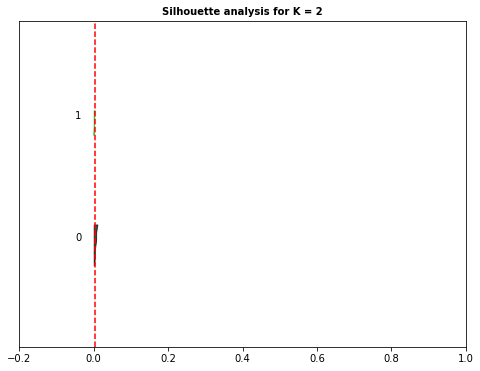

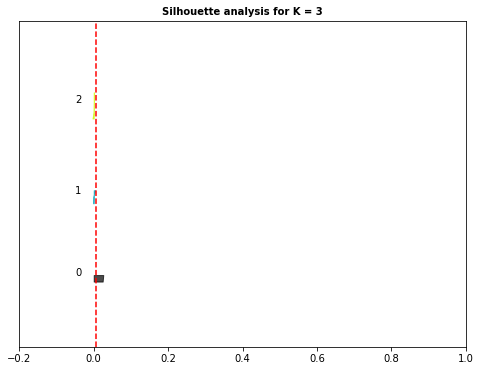

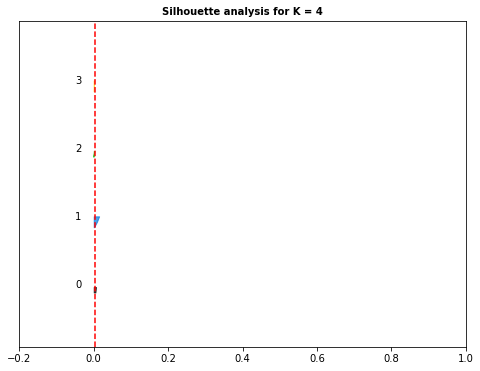

In [85]:
silhouette(kmeans_results, final_df, plot=True)

In [86]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

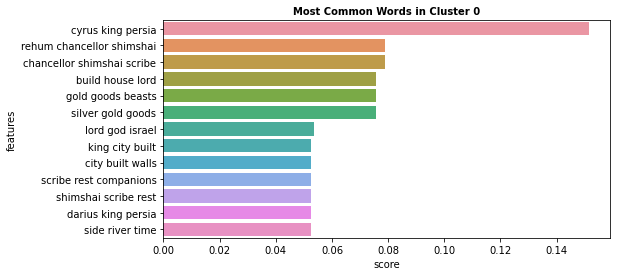

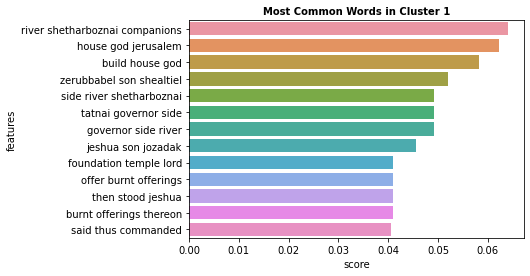

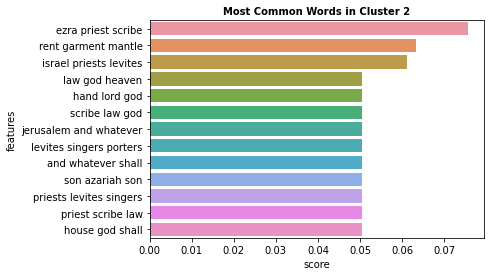

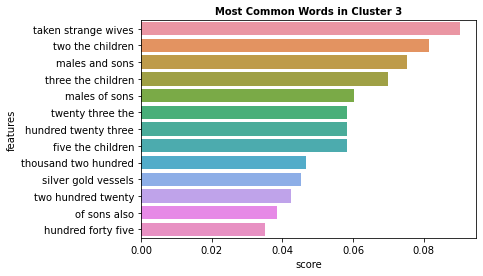

In [87]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [88]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

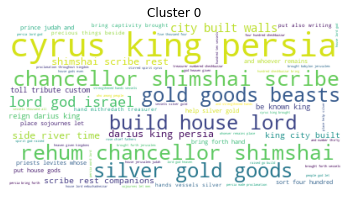

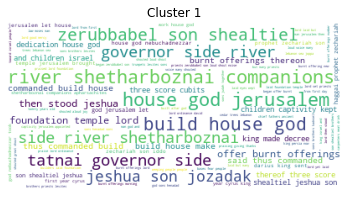

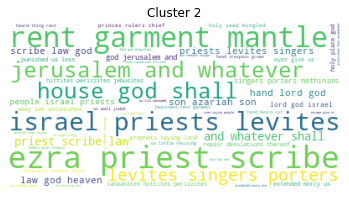

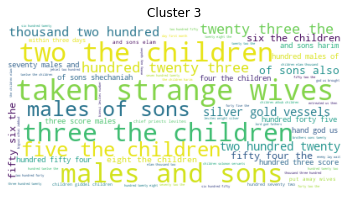

In [89]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [90]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Esdras_1,"'first', 'year', 'cyrus', 'king', 'persia', ',...",0
101,Esdras_2,"'children', 'province', 'went', 'captivity', '...",3
102,Esdras_3,"'seventh', 'month', 'come', ',', 'children', '...",1
103,Esdras_4,"'adversaries', 'judah', 'benjamin', 'heard', '...",0
104,Esdras_5,"'prophets', ',', 'haggai', 'prophet', ',', 'ze...",1


In [91]:
print(df)

         Autor                                              Livro  label
100   Esdras_1  'first', 'year', 'cyrus', 'king', 'persia', ',...      0
101   Esdras_2  'children', 'province', 'went', 'captivity', '...      3
102   Esdras_3  'seventh', 'month', 'come', ',', 'children', '...      1
103   Esdras_4  'adversaries', 'judah', 'benjamin', 'heard', '...      0
104   Esdras_5  'prophets', ',', 'haggai', 'prophet', ',', 'ze...      1
105   Esdras_6  'darius', 'king', 'made', 'decree', ',', 'sear...      1
106   Esdras_7  'things', ',', 'reign', 'artaxerxes', 'king', ...      2
107   Esdras_8  'chief', 'fathers', ',', 'genealogy', 'went', ...      3
108   Esdras_9  'things', 'done', ',', 'princes', 'came', ',',...      2
109  Esdras_10  'ezra', 'prayed', ',', 'confessed', ',', 'weep...      3
